# Carga del dataset
Gracias a las utiliades de keras se pueden cargar las imágenes del dataset de una forma muy eficiente, haciendo uso de la clase ImageDataGenerator. Esta utilidad carga las imágenes a medida que se necesitan, como cualquier otro generador en Python, ahorrando el uso de memoria necesaria para el entrenamiento. Además, inlcuye opciones para aplicar Data Augmentation durante la carga. Al tratarse de un generador sobre el que se va a iterar no se puede saber el tamaño de los datos que contiene, por lo que ese valor se ha introducido a mano en esta celda también.

In [1]:
from keras.preprocessing.image import ImageDataGenerator

base_path = 'F:\\master\\vision\\pr_learning\\dataset'
data_entrenamiento = f'{base_path}\\train\\'
data_validacion = f'{base_path}\\validation\\'
data_test = f'{base_path}\\test\\'

training_imgs = 35444
val_imgs = 2614
test_imgs = 1204

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

Con el método flow_from_directory, el generador escanea un directorio del equipo en busca de imágenes para cargar. La colocación de las imágenes en los árboles del directorio es muy importante para hacer uso de esta utilidad. En nuestro caso hay 3 directorios principales --train, validation y test--, con las imágenes que se emplearán en cada una de las fases del entrenamiento. Esos 3 directorios son los que se introducirán en el método flow_from_directory, utilizando cada uno de ellos un generador distinto. Los 3 directorios principales que acabamos de señalar comparten la misma estructura interna, ya que tienen en su interior 43 directorios --en el dataset hay 43 clases, un directorio por cada clase del clasificador--, y dentro de cada carpeta las imágenes correspondientes a la misma clase.

In [2]:
batch_size_ff = 128

entrenamiento_generador_ff = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

validacion_generador_ff = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_ff = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 1204 images belonging to 43 classes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# Creación de modelos
## ffNN
Para la primera parte del ejercicio, se crearon 3 modelos distintos con el objetivo de poder compararlos. Estas funciones, que se emplearán más adelante, crean los modelos para ser utilizados.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization

def build_model_v1():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(1024, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))   
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

### Modelo 1

In [5]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
276/276 [==============================] - 538s 2s/step - loss: 2.4875 - accuracy: 0.3310 - val_loss: 1.7376 - val_accuracy: 0.5215
Epoch 2/30
276/276 [==============================] - 24s 88ms/step - loss: 1.5446 - accuracy: 0.5415 - val_loss: 1.2104 - val_accuracy: 0.6426
Epoch 3/30
276/276 [==============================] - 24s 88ms/step - loss: 1.2529 - accuracy: 0.6204 - val_loss: 0.9238 - val_accuracy: 0.7293
Epoch 4/30
276/276 [==============================] - 24s 88ms/step - loss: 1.1099 - accuracy: 0.6636 - val_loss: 0.8688 - val_accuracy: 0.7523
Epoch 5/30
276/276 [==============================] - 24s 89ms/step - loss: 1.0233 - accuracy: 0.6856 - val_loss: 0.7015 - val_accuracy: 0.7996
Epoch 6/30
276/276 [==============================] - 24s 88ms/step - loss: 0.9650 - accuracy: 0.7055 - val_loss: 0.6967 - val_accuracy: 0.7922
Epoch 7/30
276/276 [==============================] - 25s 91m

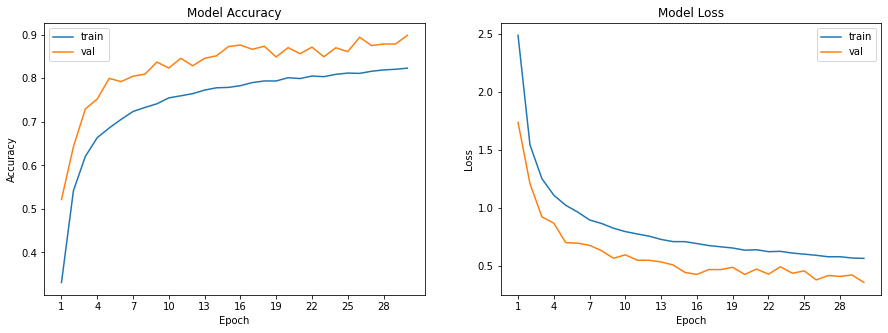

Training MLP took 1279.99360704422 seconds


In [6]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Modelo 2

In [7]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)               

Epoch 1/30
276/276 [==============================] - 25s 92ms/step - loss: 3.4421 - accuracy: 0.1144 - val_loss: 2.9187 - val_accuracy: 0.2551
Epoch 2/30
276/276 [==============================] - 25s 92ms/step - loss: 2.8194 - accuracy: 0.2407 - val_loss: 2.3656 - val_accuracy: 0.3875
Epoch 3/30
276/276 [==============================] - 25s 92ms/step - loss: 2.4473 - accuracy: 0.3066 - val_loss: 1.9871 - val_accuracy: 0.4230
Epoch 4/30
276/276 [==============================] - 26s 93ms/step - loss: 2.2497 - accuracy: 0.3347 - val_loss: 1.8871 - val_accuracy: 0.4363
Epoch 5/30
276/276 [==============================] - 26s 94ms/step - loss: 2.1258 - accuracy: 0.3573 - val_loss: 1.7465 - val_accuracy: 0.4535
Epoch 6/30
276/276 [==============================] - 26s 92ms/step - loss: 2.0427 - accuracy: 0.3708 - val_loss: 1.6127 - val_accuracy: 0.4746
Epoch 7/30
276/276 [==============================] - 26s 94ms/step - loss: 1.9847 - accuracy: 0.3843 - val_loss: 1.5269 - val_accuracy:

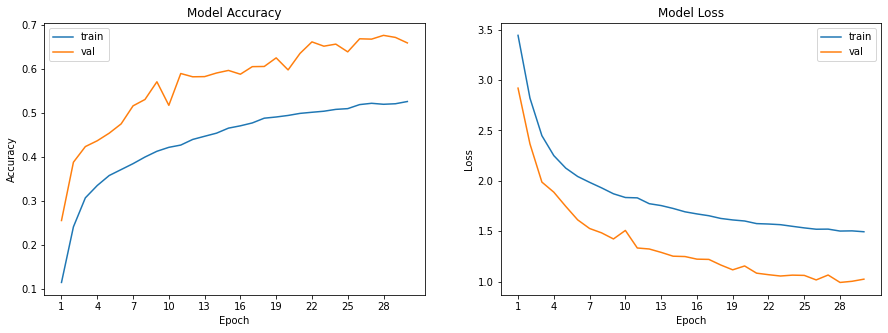

Training MLP took 768.7022380828857 seconds


In [8]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Modelo 3

In [9]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_8 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)              

Epoch 1/30
276/276 [==============================] - 27s 96ms/step - loss: 3.5636 - accuracy: 0.1084 - val_loss: 3.2948 - val_accuracy: 0.1664
Epoch 2/30
276/276 [==============================] - 27s 97ms/step - loss: 2.7579 - accuracy: 0.2533 - val_loss: 2.6606 - val_accuracy: 0.3266
Epoch 3/30
276/276 [==============================] - 27s 96ms/step - loss: 2.2776 - accuracy: 0.3421 - val_loss: 2.1037 - val_accuracy: 0.4285
Epoch 4/30
276/276 [==============================] - 26s 96ms/step - loss: 1.9593 - accuracy: 0.4049 - val_loss: 2.0696 - val_accuracy: 0.4078
Epoch 5/30
276/276 [==============================] - 27s 97ms/step - loss: 1.7906 - accuracy: 0.4461 - val_loss: 1.9912 - val_accuracy: 0.4059
Epoch 6/30
276/276 [==============================] - 27s 96ms/step - loss: 1.6429 - accuracy: 0.4862 - val_loss: 1.4040 - val_accuracy: 0.5543
Epoch 7/30
276/276 [==============================] - 27s 98ms/step - loss: 1.5326 - accuracy: 0.5201 - val_loss: 1.3958 - val_accuracy:

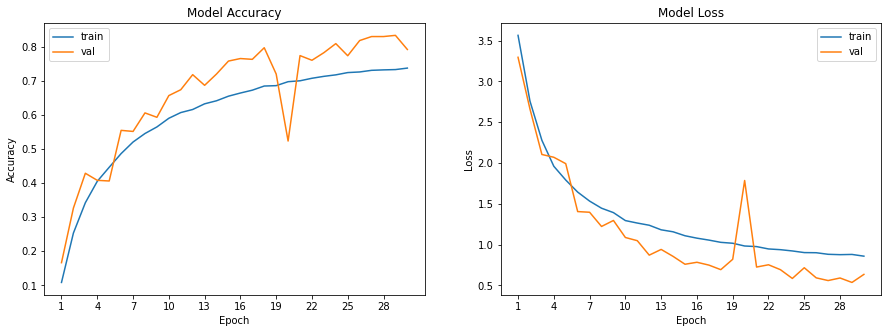

Training MLP took 801.1518082618713 seconds


In [10]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Red convolucional


In [11]:
batch_size_cnn = 512

entrenamiento_generador_cnn = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

validacion_generador_cnn = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_cnn = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 1204 images belonging to 43 classes.


Al igual que se hizo con las ffNN, antes de experimetar, se define una función que crea el modelo convolucional.

In [12]:
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(block3)

    x = Flatten()(x)
    output = Dense(43, activation='softmax')(x)
    return Model(net_input, output)


Una vez definida la función, se crea y experimenta con ella

In [13]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)       

Epoch 1/10
69/69 [==============================] - 122s 2s/step - loss: 1.4188 - accuracy: 0.5976 - val_loss: 3.5331 - val_accuracy: 0.0437
Epoch 2/10
69/69 [==============================] - 122s 2s/step - loss: 0.3996 - accuracy: 0.8687 - val_loss: 4.0296 - val_accuracy: 0.0906
Epoch 3/10
69/69 [==============================] - 127s 2s/step - loss: 0.2326 - accuracy: 0.9211 - val_loss: 4.2790 - val_accuracy: 0.1844
Epoch 4/10
69/69 [==============================] - 122s 2s/step - loss: 0.1807 - accuracy: 0.9401 - val_loss: 4.4402 - val_accuracy: 0.2781
Epoch 5/10
69/69 [==============================] - 124s 2s/step - loss: 0.1538 - accuracy: 0.9488 - val_loss: 2.5846 - val_accuracy: 0.4828
Epoch 6/10
69/69 [==============================] - 123s 2s/step - loss: 0.1218 - accuracy: 0.9591 - val_loss: 1.2913 - val_accuracy: 0.6734
Epoch 7/10
69/69 [==============================] - 129s 2s/step - loss: 0.0962 - accuracy: 0.9692 - val_loss: 0.6210 - val_accuracy: 0.8594
Epoch 8/10
69

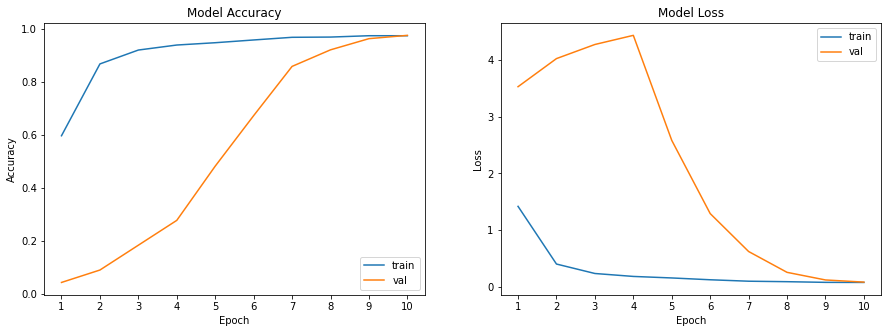

Training MLP took 1259.7120990753174 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_cnn, steps_per_epoch=training_imgs//batch_size_cnn, epochs=10, verbose=1, validation_data=validacion_generador_cnn, validation_steps=val_imgs//batch_size_cnn)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_cnn, test_imgs//batch_size_cnn if test_imgs//batch_size_cnn > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")